In [ ]:
# Ref Static : https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a
# Ref ROC : https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

__Precision: it answers the question: “When it predicts the positive result, how often is it correct?”__

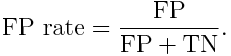

`Precision is usually used when the goal is to limit the number of false positives (FP). For example, this would be the metric to focus on if our goal with the spam filtering algorithm is to minimize the number of reals emails that are classified as spam.`

__Recall: it answers the question: “When it is actually the positive result, how often does it predict correctly?”__

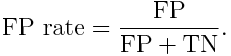

`Recall is usually used when the goal is to limit the number of false negatives (FN). In our example, that would correspond to minimizing the number of spam emails that are classified as real emails. Recall is also known as “sensitivity” and “true positive rate” (TPR).`

__f1-score: this is just the harmonic mean of precision and recall:__

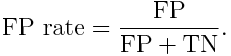

It is useful when you need to take both precision and recall into account. If you try to only optimize recall, your algorithm will predict most examples to belong to the positive class, but that will result in many false positives and, hence, low precision. On the other hand, if you try to optimize precision, your model will predict very few examples as positive results (the ones which highest probability), but recall will be very low.

__ROC curve__

A more visual way to measure the performance of a binary classifier is the receiver operating characteristic (ROC) curve. It is created by plotting the true positive rate (TPR) (or recall) against the false positive rate (FPR), which we haven’t defined explicitly yet:

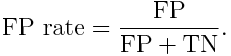

The question it answers is the following: “When it is actually the negative result, how often does it predict incorrectly?”



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data_table = pd.read_csv("./data/NUSW-NB15_features.csv", encoding="latin1")

data_table[:5]

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [20]:
df = pd.read_csv("./data/UNSW_NB15_training-set.csv", low_memory=False)

pd.options.display.max_rows = 500

df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [9]:
df.shape

(82332, 45)

In [5]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [6]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
id                   82332 non-null int64
dur                  82332 non-null float64
proto                82332 non-null object
service              82332 non-null object
state                82332 non-null object
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-n

In [22]:
### count Proto
df.proto.value_counts()

tcp            43095
udp            29418
unas            3515
arp              987
ospf             676
sctp             324
any               96
gre               88
rsvp              64
ipv6              61
sep               58
sun-nd            54
swipe             52
pim               52
mobile            52
prm               34
xns-idp           34
leaf-1            34
bbn-rcc           34
argus             33
trunk-1           33
st2               33
cbt               33
trunk-2           33
emcon             33
xnet              33
iso-tp4           33
egp               33
chaos             33
leaf-2            33
dcn               33
hmp               33
netblt            33
ip                33
ggp               33
nvp               33
irtp              33
mux               33
rdp               33
igp               33
pup               33
ipnip             33
pipe              32
dgp               32
qnx               32
xtp               32
sm                32
uti          

In [23]:
### count service
df.service.value_counts()

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

In [24]:
### count state
df.state.value_counts()

FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: state, dtype: int64

In [26]:
### count attact cat

df.attack_cat.value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [8]:
proto = pd.get_dummies(df['proto'], drop_first=True)
service = pd.get_dummies(df['service'], drop_first=True)
state = pd.get_dummies(df['state'], drop_first=True)
attack_cat = pd.get_dummies(df['attack_cat'], drop_first=True)

# # drop old column data 
df.drop(['proto', 'service', 'state', 'attack_cat'], axis = 1, inplace = True)

# add new type of data to dataset
df = pd.concat([df, proto, service, state, attack_cat], axis = 1)

df

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,RST,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
0,1,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,...,0,0,0,0,0,0,1,0,0,0
1,2,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,...,0,0,0,0,0,0,1,0,0,0
2,3,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,...,0,0,0,0,0,0,1,0,0,0
3,4,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,...,0,0,0,0,0,0,1,0,0,0
4,5,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,...,0,0,0,0,0,0,1,0,0,0
82328,82329,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,...,0,0,0,0,0,0,1,0,0,0
82329,82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,...,0,0,0,0,0,0,1,0,0,0
82330,82331,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,...,0,0,0,0,0,0,1,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.drop(["label"], axis=1), df["label"], test_size=0.3, random_state=0)


# Naive Bayes

In [10]:
###Start Naive Bayes model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [83]:
### accuracy
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print ("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.67     11124
           1       0.73      0.80      0.76     13576

    accuracy                           0.73     24700
   macro avg       0.73      0.72      0.72     24700
weighted avg       0.73      0.73      0.72     24700

Accuracy:  0.7258299595141701


In [77]:
### confusion matrix
from sklearn.metrics import confusion_matrix

print ("Confusion Matrix ")
confusion_matrix(y_test, y_pred)

Confusion Matrix 


array([[ 7009,  4115],
       [ 2657, 10919]])

fpr :  [0.00000000e+00 3.59582884e-04 7.19165768e-04 ... 8.61650485e-01
 9.09924488e-01 1.00000000e+00]
tpr :  [0.         0.00405127 0.00640837 ... 1.         1.         1.        ]
thresholds :  [2.00000000e+000 1.00000000e+000 1.00000000e+000 ... 9.75512157e-054
 6.42285340e-323 0.00000000e+000]
auc :  0.8248278214860626


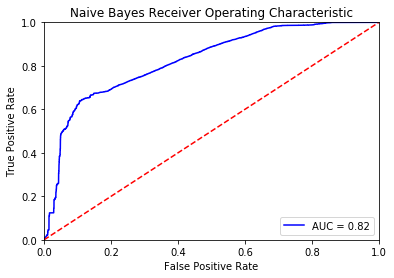

In [101]:
### Roc Curves and Auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs = gnb.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print ("fpr : ", fpr)
print ("tpr : ", tpr)
print ("thresholds : ", thresholds)
print ("auc : ", roc_auc)

import matplotlib.pyplot as plt
plt.title('Naive Bayes Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# Logistic Regression

In [82]:
### Start Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

prediction = logmodel.predict(X_test)

/Users/tanatjakphan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
print(classification_report(y_test, prediction))
print ("Accuracy: ", metrics.accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76     11124
           1       0.87      0.64      0.74     13576

    accuracy                           0.75     24700
   macro avg       0.77      0.76      0.75     24700
weighted avg       0.78      0.75      0.75     24700

Accuracy:  0.747004048582996


In [102]:
### confusion matrix
from sklearn.metrics import confusion_matrix

print ("Confusion Matrix ")
confusion_matrix(y_test, prediction)

Confusion Matrix 


array([[9782, 1342],
       [4907, 8669]])

fpr :  [0.         0.         0.         ... 0.85868393 0.85868393 1.        ]
tpr :  [0.00000000e+00 7.36593989e-05 5.15615793e-04 ... 9.99926341e-01
 1.00000000e+00 1.00000000e+00]
thresholds :  [1.99999990e+00 9.99999904e-01 9.99836976e-01 ... 6.28302581e-03
 6.26745392e-03 2.55100569e-22]
auc :  0.8608737442939791


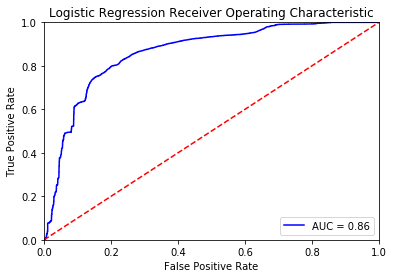

In [103]:
### Roc Curves and Auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs = logmodel.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print ("fpr : ", fpr)
print ("tpr : ", tpr)
print ("thresholds : ", thresholds)
print ("auc : ", roc_auc)

import matplotlib.pyplot as plt
plt.title('Logistic Regression Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [3]:
#### import testing file
test = pd.read_csv("./data/UNSW_NB15_testing-set.csv")

In [1]:

proto = pd.get_dummies(test['proto'], drop_first=True)
service = pd.get_dummies(test['service'], drop_first=True)
state = pd.get_dummies(test['state'], drop_first=True)
attack_cat = pd.get_dummies(test['attack_cat'], drop_first=True)

# # drop old column data 
test.drop(['proto', 'service', 'state', 'attack_cat'], axis = 1, inplace = True)

# add new type of data to dataset
test = pd.concat([test, proto, service, state, attack_cat], axis = 1)


NameError: name 'pd' is not defined

In [94]:
# export_csv = df.to_csv(r"./data/unsw_nb15_clean_data.csv", index = False, header = True)

In [4]:
test.shape

(175341, 45)